In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pickle as p

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv', sep=',')

print(df.shape)
df.head(2)

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

describe(df.select_dtypes(include=['int64']))

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000
skew,0.684818,8.360308,0.093079,3.144318,4.898650,2.615715,41.846454
kurt,0.319570,140.751547,-1.059897,18.153915,39.249651,6.935195,4506.860660


In [5]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
df = df[
    (df.education != 'unknown') &
    (df.poutcome != 'unknown') &
    (df.job != 'unknown') &
    (df.contact != 'unknown')
]

df.shape

(7842, 17)

In [9]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

label_encoder = LabelEncoder()
for col in df_copy.select_dtypes(["object", "category"]):
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

In [10]:
num_cols = [x for x in df.columns if df[x].dtype != 'object']
cat_cols = [x for x in df.columns if df[x].dtype == 'object']

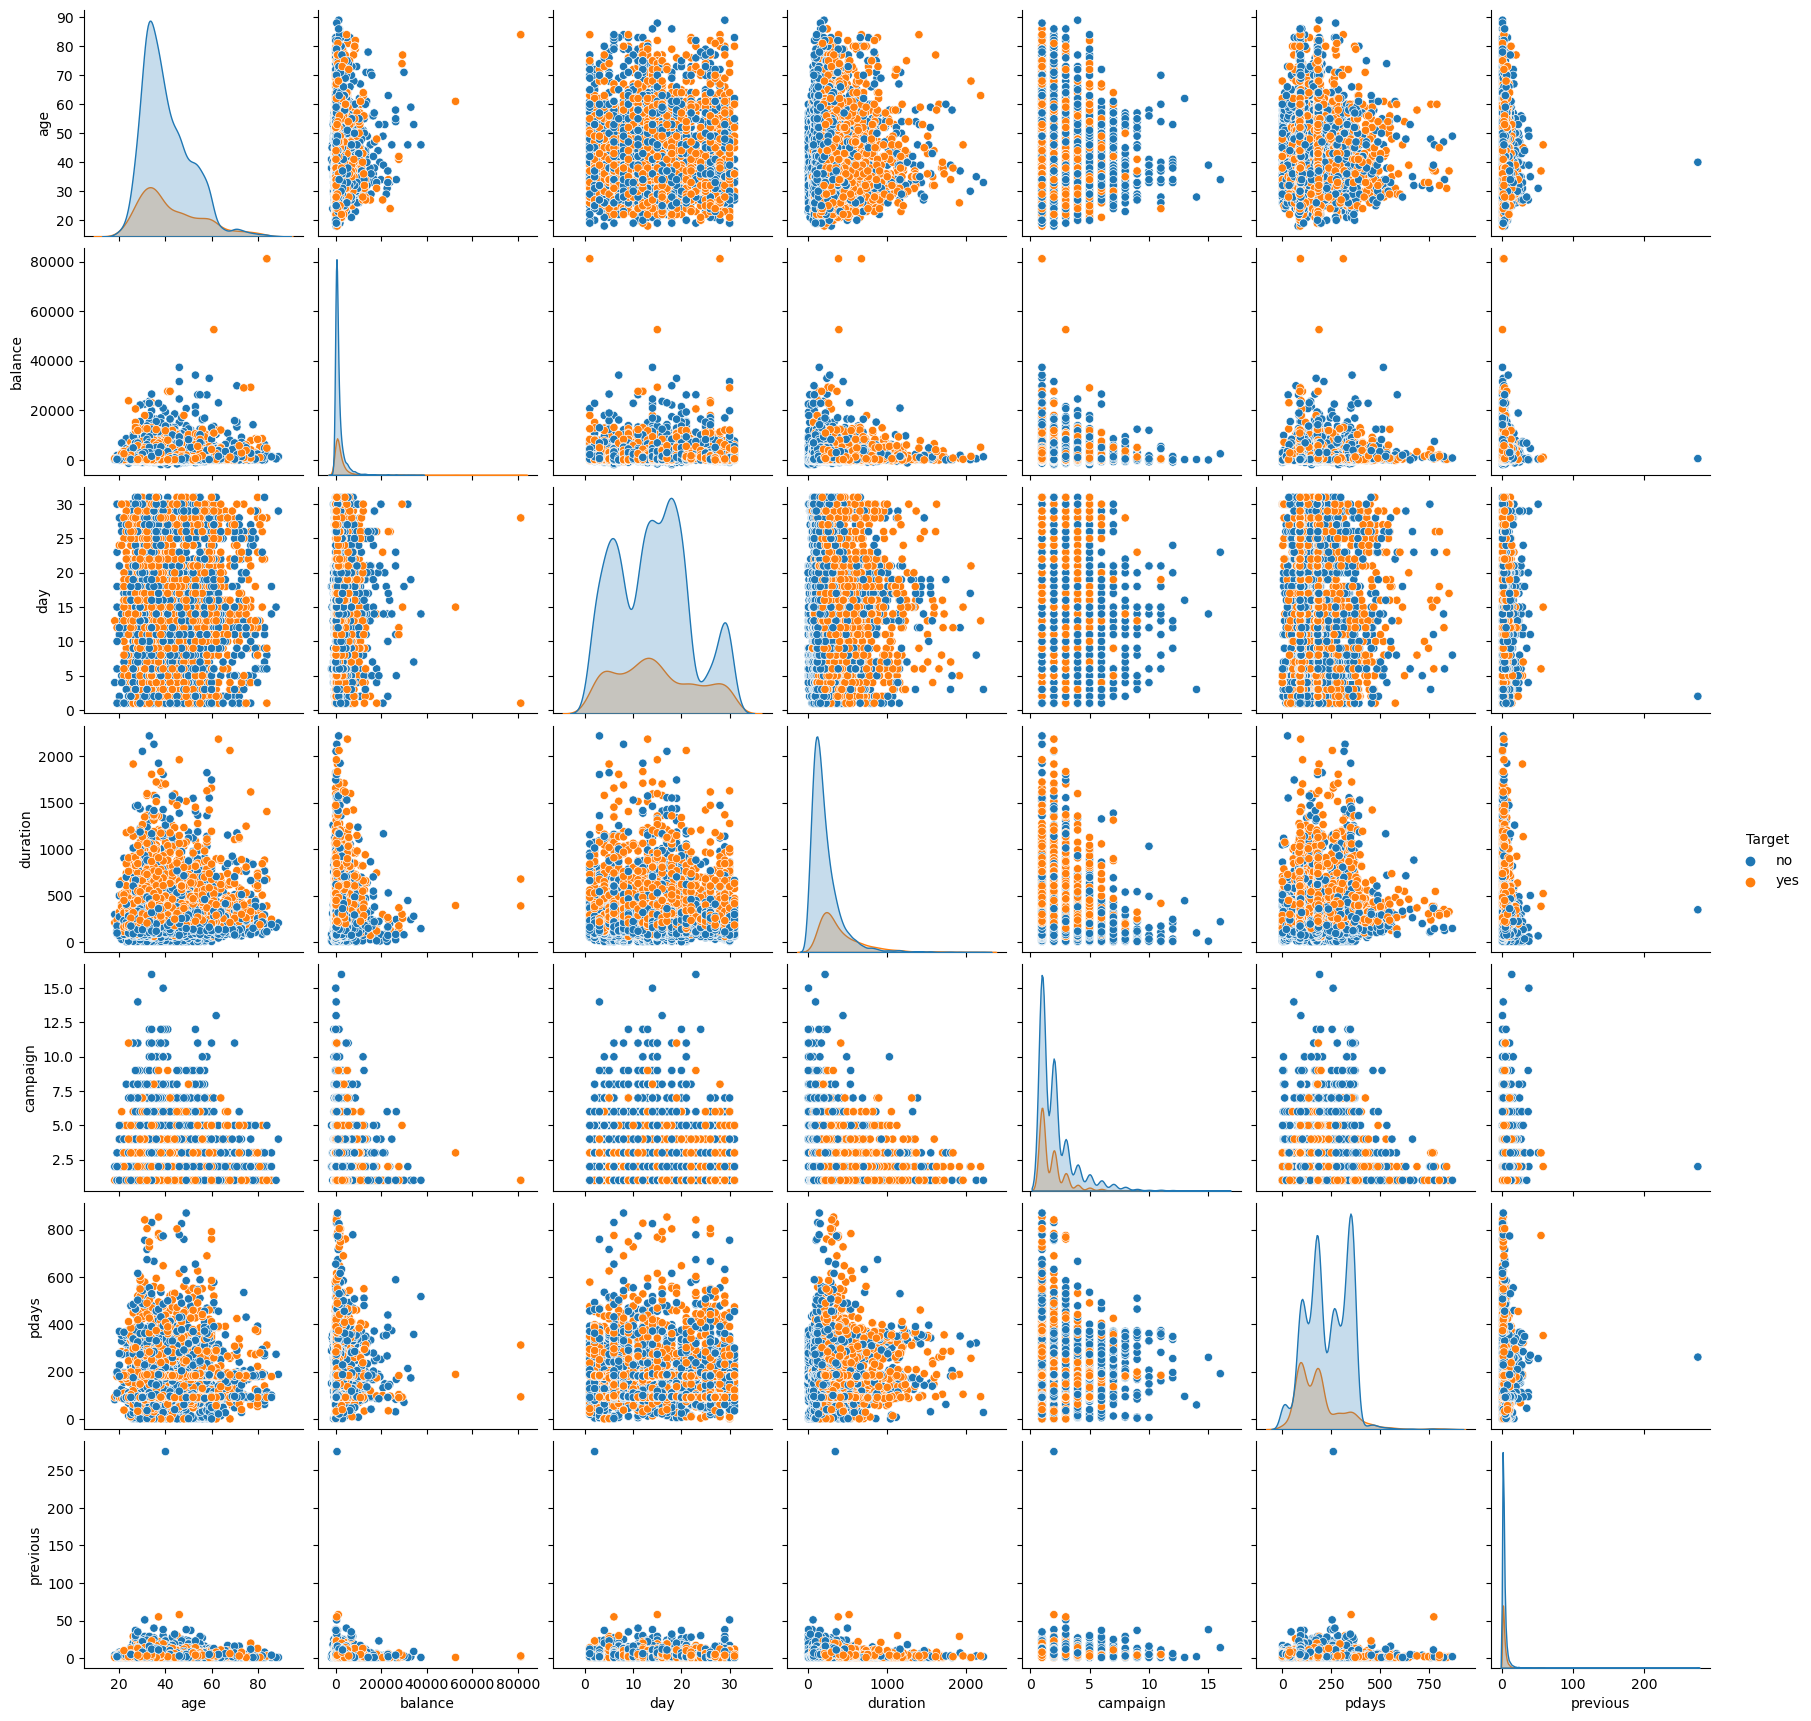

In [11]:
sns.pairplot(df, hue='Target')

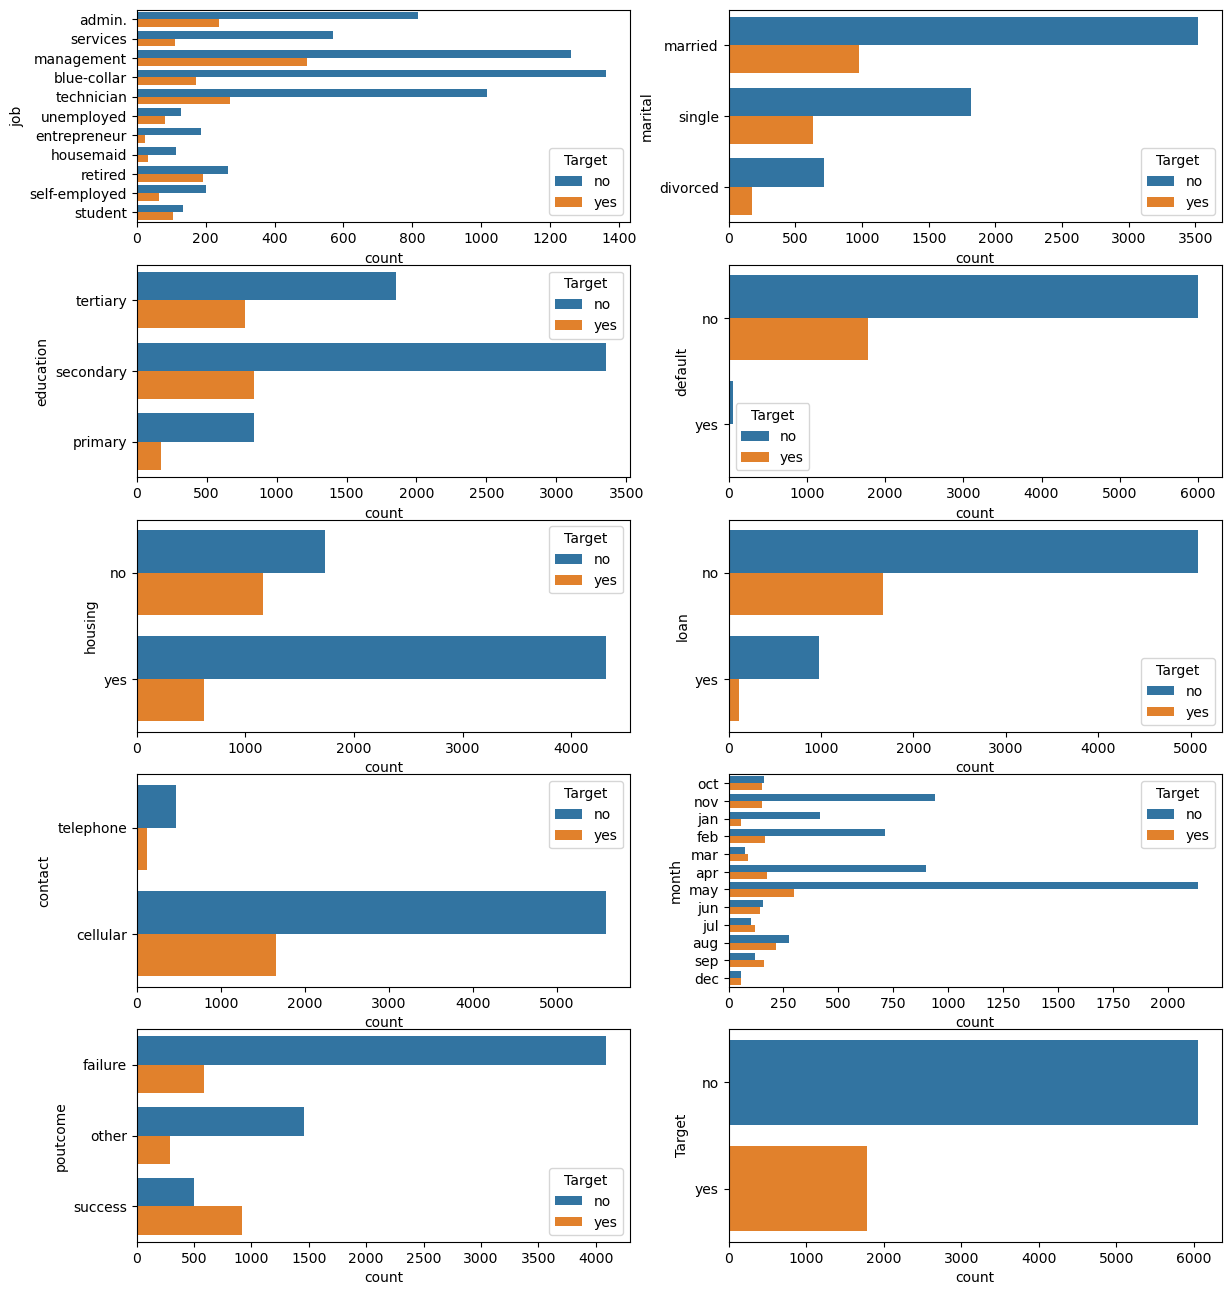

In [12]:
fig, ax= plt.subplots(nrows=5, ncols=2, figsize= (14,16))
sns.countplot(y='job', hue='Target', data=df, ax=ax[0][0])
sns.countplot(y='marital', hue='Target', data=df, ax=ax[0][1])
sns.countplot(y='education', hue='Target', data=df, ax=ax[1][0])
sns.countplot(y='default', hue='Target', data=df, ax=ax[1][1])
sns.countplot(y='housing', hue='Target', data=df, ax=ax[2][0])
sns.countplot(y='loan', hue='Target', data=df, ax=ax[2][1])
sns.countplot(y='contact', hue='Target', data=df, ax=ax[3][0])
sns.countplot(y='month', hue='Target', data=df, ax=ax[3][1])
sns.countplot(y='poutcome', hue='Target', data=df, ax=ax[4][0])
sns.countplot(y='Target', data=df, ax=ax[4][1]);

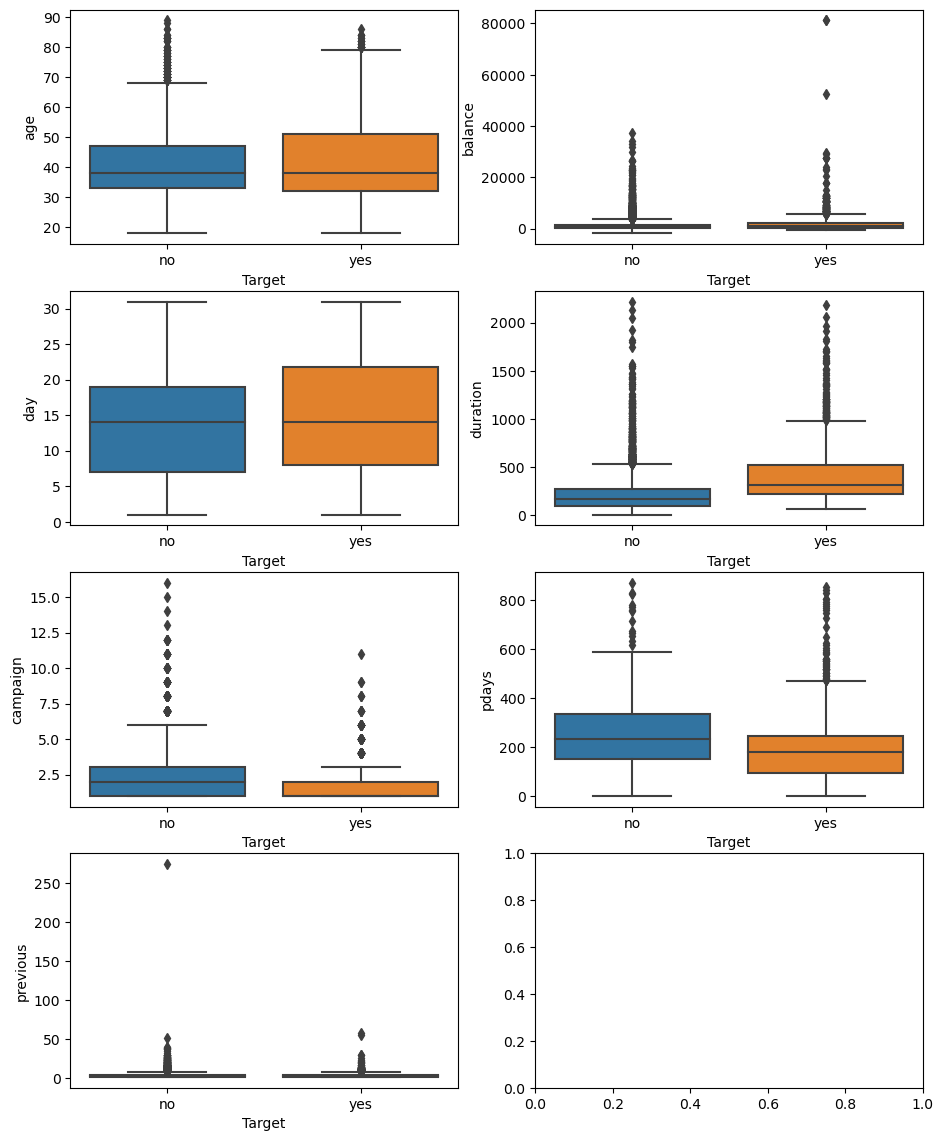

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(11,14))
sns.boxplot(x='Target', y='age', data=df, ax=ax[0][0])
sns.boxplot(x='Target', y='balance', data=df, ax=ax[0][1])
sns.boxplot(x='Target', y='day', data=df, ax=ax[1][0])
sns.boxplot(x='Target', y='duration', data=df, ax=ax[1][1])
sns.boxplot(x='Target', y='campaign', data=df, ax=ax[2][0])
sns.boxplot(x='Target', y='pdays', data=df, ax=ax[2][1])
sns.boxplot(x='Target', y='previous', data=df, ax=ax[3][0]);

<Axes: >

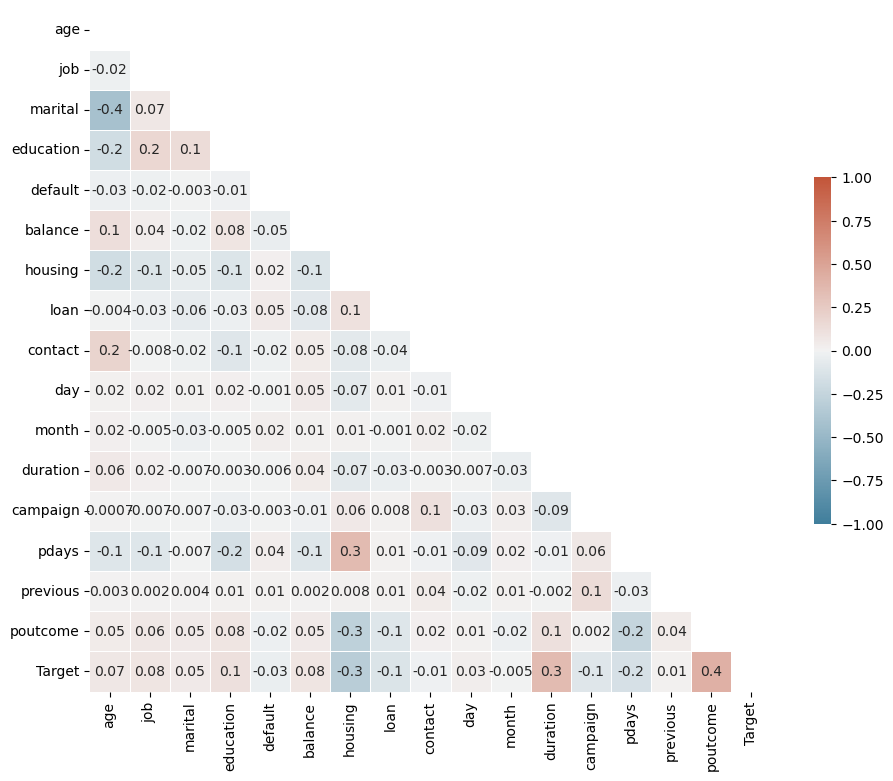

In [14]:
corr = df_copy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')

In [15]:
X = df_copy.drop(['Target', 'duration'], axis=1)
y = df_copy['Target']

In [16]:
from sklearn.feature_selection import mutual_info_classif


def make_mi_scores(x, y):
    """ Вычислить показатель MI для каждого признака типа int. """

    x = x.copy()
    for colname in x.select_dtypes(["object", "category"]):
        x[colname], _ = x[colname].factorize()

    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    
    mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

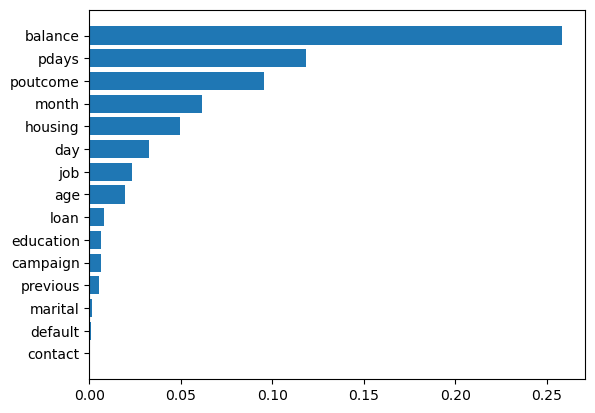

In [17]:
mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

In [18]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier, plot_importance


def score_dataset(x, y, model, scoring='precision'):

    for colname in x.select_dtypes(['category', 'object']):
        x[colname], _ = x[colname].factorize()

    score = cross_val_score(
        model, x, y, cv=5, scoring=scoring,
    )

    score = score.mean()
    return score

In [19]:
score_dataset(X, y, XGBClassifier())

0.12805670565235577

In [20]:
score_dataset(X[['balance', 'pdays', 'poutcome']], y, XGBClassifier())

0.5490159964170044

In [24]:
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

perm = PermutationImportance(XGBClassifier().fit(X_train, y_train), random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\maxim\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [22]:
score_dataset(X[['poutcome', 'pdays']], y, XGBClassifier())

0.5925242580212007

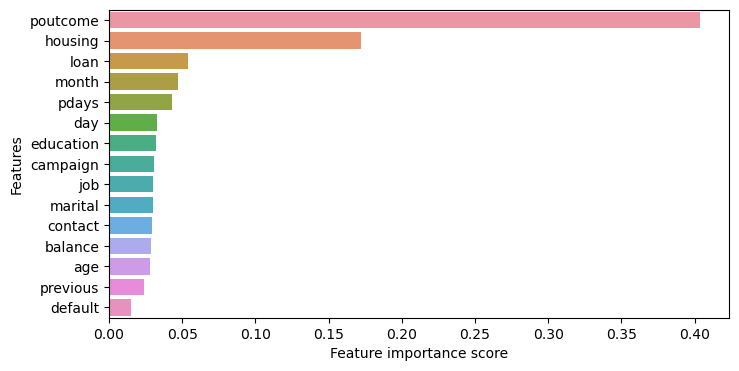

In [23]:
model = XGBClassifier()
model.fit(X, y)

feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [25]:
score_dataset(X[['poutcome']], y, XGBClassifier())

0.6901974545553514

In [26]:
score_dataset(X[['poutcome', 'housing', 'campaign']], y, XGBClassifier())

0.7090173133832807

In [33]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(x, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    #with open(cls.__tokenizerfilename, 'wb') as handle:
    #          p.dump(tokenizer, handle,
    #          protocol=p.HIGHEST_PROTOCOL)
    plt.figure(figsize = (4,4))
    b = sns.heatmap(cf_matrix, annot=True, fmt='g')
    b.set(title='Confusion Matrix')
    b.set(xlabel='Predicted', ylabel='Actual')
    plt.show()

[0 0 0 ... 0 0 0]


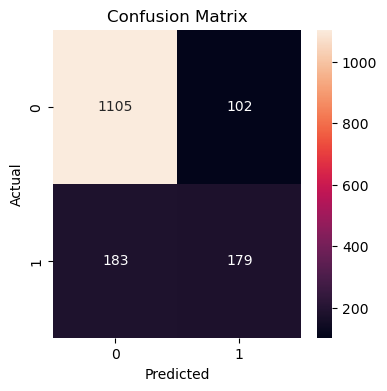

In [34]:
create_confusion_matrix(X[['poutcome', 'housing', 'campaign']], y, XGBClassifier())